In [1]:
import cv2
import os
import sys
import numpy as np
import glob
import matplotlib.pyplot as plt
  

In [93]:
%run function

In [99]:
%run Function1

<Figure size 432x288 with 0 Axes>

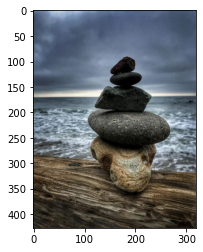

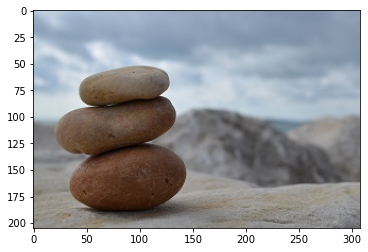

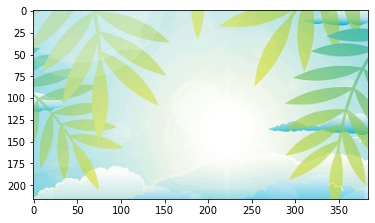

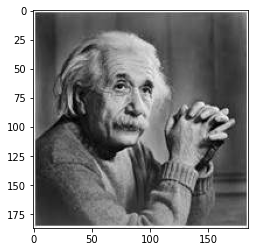

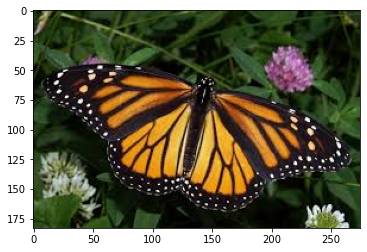

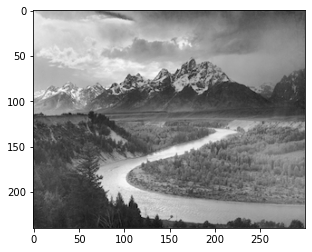

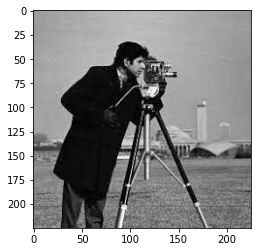

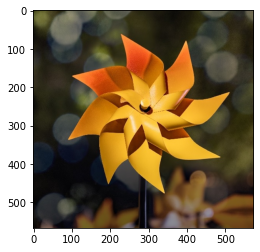

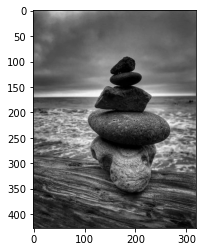

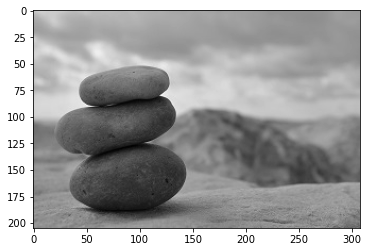

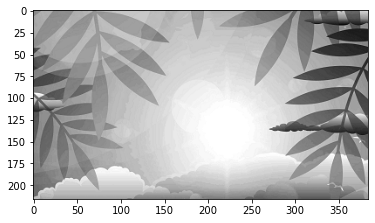

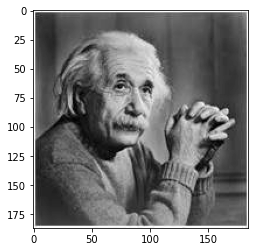

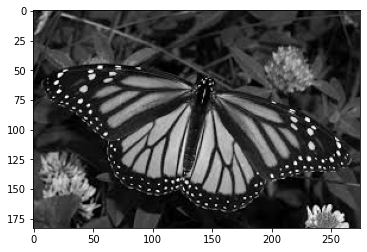

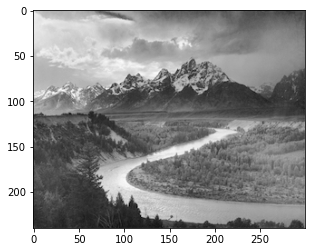

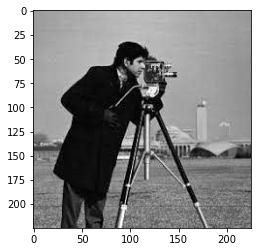

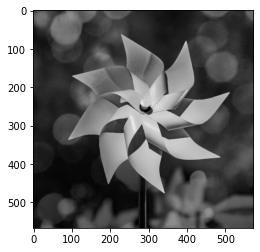

In [98]:
images_grey=[]
images=[]
for img_path in glob.glob('images/*.*'):
    images_grey.append(cv2.imread(img_path,0))
    images.append(cv2.cvtColor(cv2.imread(img_path,1),cv2.COLOR_BGR2RGB))

for i in range(8):
    plt.imshow(images[i])
    plt.show()
    
for i in range(8):
    plt.imshow(images_grey[i],cmap="gray")
    plt.show()  

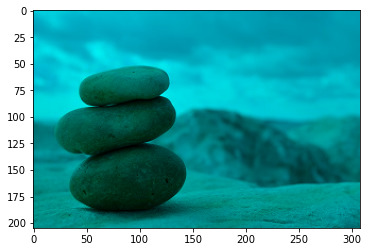

In [58]:
plt.imshow(rgbExclusion(images[1],0))
plt.show()

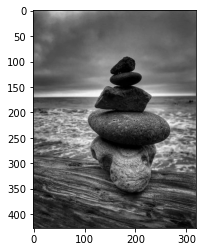

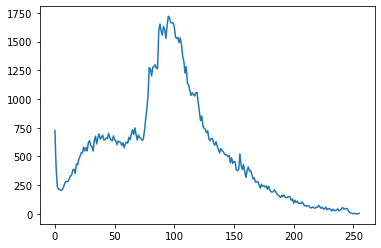

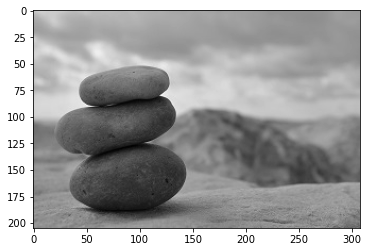

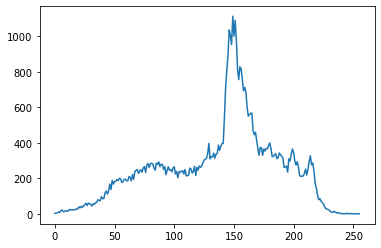

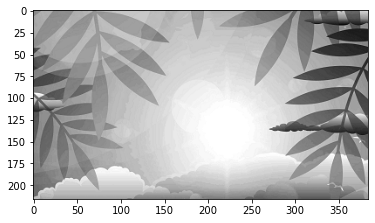

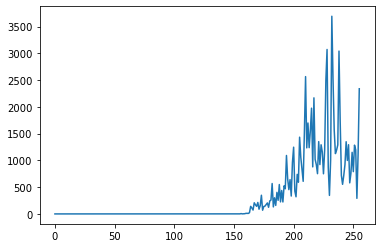

In [69]:
l=0
while l<3:
    plt.imshow(images_grey[l],cmap="gray")
    plt.show()    
    img = images_grey[l]
    l += 1
    # find frequency of pixels in range 0-255 
    histr = cv2.calcHist([img],[0],None,[256],[0,256]) 

    # show the plotting graph of an image 
    plt.plot(histr) 
    plt.show()

Populating the interactive namespace from numpy and matplotlib


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


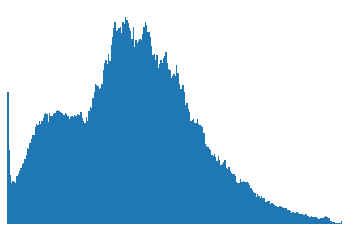

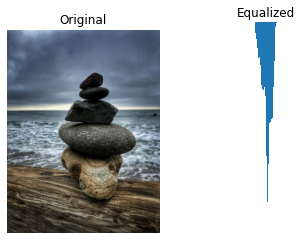

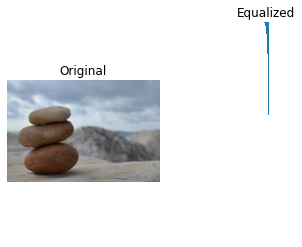

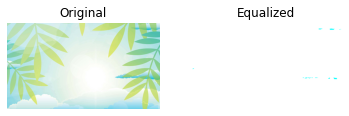

In [91]:
%pylab inline
import scipy.ndimage as nd
import matplotlib.cm as cm

l=0
while l<3:
    img = images[l]
    axis('off')

    hist(img.flatten(), bins = 256)

    histogram, edges = np.histogram(img.flatten(), bins = 256)
    cdf = histogram.cumsum().astype("float")
    xlim([0, 255])
    cdf_scaled = np.round(((cdf - cdf.min()) / ((img.shape[0] * img.shape[1]) - cdf.min())) * 255)
    xlim([0, 255])


    img2 = cdf_scaled[img.astype("uint8")]
    axis('off')
    f, (ax1, ax2) = subplots(1, 2)
    ax1.set_title("Original")
    ax1.axis('off')
    ax1.imshow(img, cmap = cm.gray)
    ax2.set_title("Equalized")
    ax2.axis('off')
    ax2.imshow(img2, cmap = cm.gray)
    l += 1

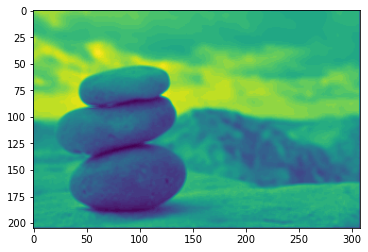

In [115]:
plt.imshow(myConvolve2d(images_grey[1],np.ones((3,3),np.float32)/49))
plt.show()

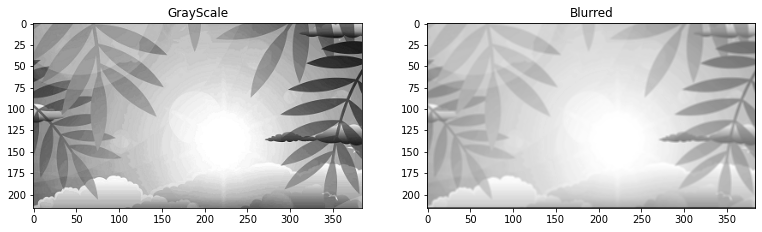

In [121]:
from scipy import signal
f = signal.convolve2d(img,kernel, 'same')
plt.imshow(f,cmap=plt.cm.gray)

l=0
while l<3: 
    img = images_grey[l]

    kernel = np.ones((3,3),np.float32)/9 #blur
    f = signal.convolve2d(img,kernel, 'same')

    plt.rcParams['figure.figsize'] = (20.0, 16.0) # set default size of plots
    fig = plt.figure()
    fig.add_subplot(3, 3, 1)
    plt.imshow(img,cmap=plt.cm.gray)
    plt.title("GrayScale")
    fig.add_subplot(3, 3, 2)
    plt.imshow(f,cmap=plt.cm.gray)
    plt.title("Blurred")
    l+=1

Text(0.5, 1.0, 'Gaussian Filter, sigma=4')

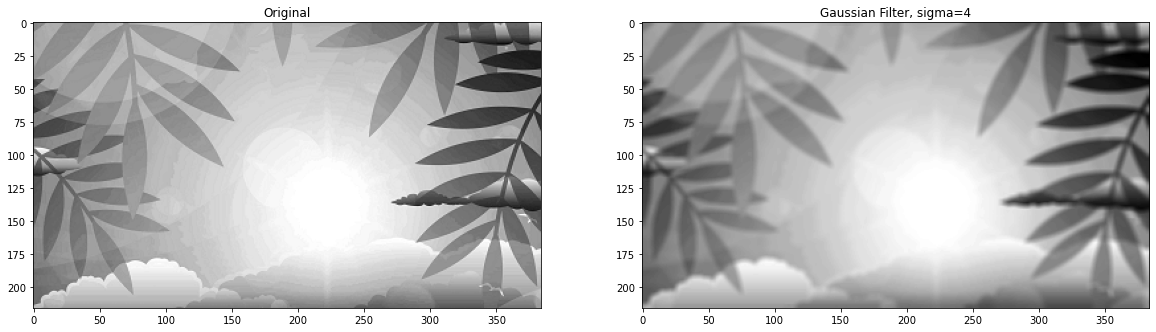

In [122]:
img_gaussianFilter = cv2.GaussianBlur(img, (5,5),sigmaX=4)
fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.imshow(img,cmap=plt.cm.gray)
plt.title("Original")
fig.add_subplot(1, 2, 2)
plt.imshow(img_gaussianFilter,cmap=plt.cm.gray)
plt.title("Gaussian Filter, sigma=4")

In [156]:

from skimage.util import random_noise
gaussian_noise_image = random_noise(images[1], mode='gaussian') #Using skimage to add Gaussian noise
plt.imshow(gaussian_noise_image)
plt.show()
gaussian_noise_and_sp_image = random_noise(gaussian_noise_image, mode='s&p',amount=0.1)  #Using skimage to add sal and pepper noise
plt.imshow(gaussian_noise_and_sp_image)
plt.show()


Text(0.5, 1.0, 'Median Filter')

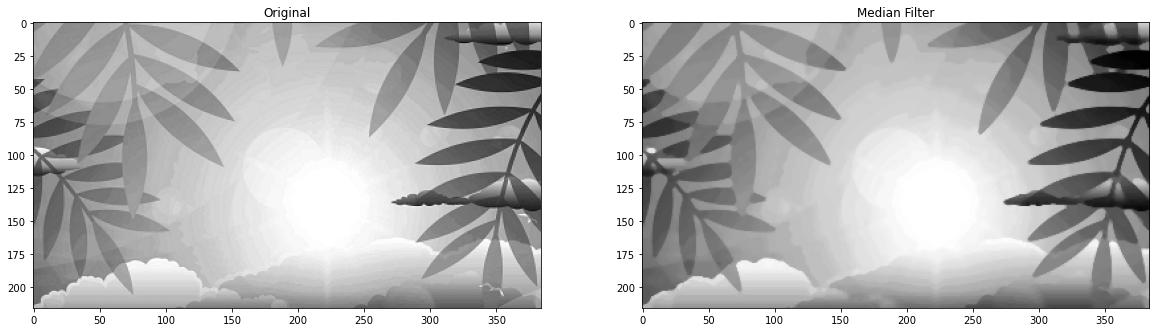

In [157]:
img_med = cv2.medianBlur(img,5)
fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.imshow(img,cmap=plt.cm.gray)
plt.title("Original")
fig.add_subplot(1, 2, 2)
plt.imshow(img_med,cmap=plt.cm.gray)
plt.title("Median Filter")

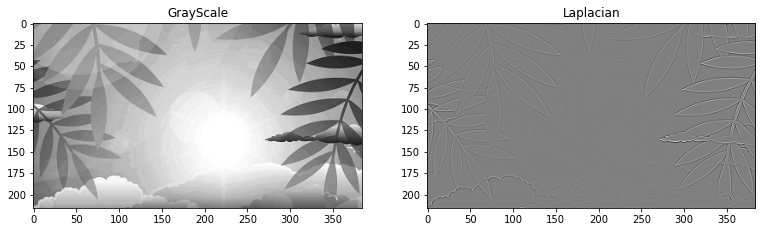

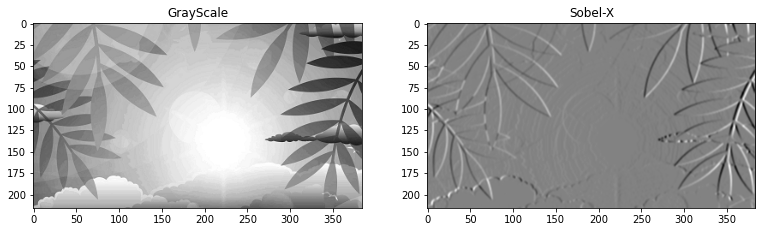

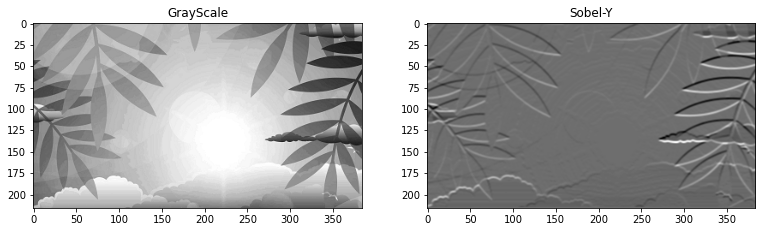

In [159]:
import cv2
import os
import sys
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
laplacian = np.array((
	[0, 1, 0],
	[1, -4, 1],
	[0, 1, 0]), dtype="int")
 
# Sobel x-axis kernel
sobelX = np.array((
	[-1, 0, 1],
	[-2, 0, 2],
	[-1, 0, 1]), dtype="int")
 
# Sobel y-axis kernel
sobelY = np.array((
	[-1, -2, -1],
	[0, 0, 0],
	[1, 2, 1]), dtype="int")
from scipy import signal

def compute_gradients(img,laplacian,sobelX,sobelY):
    img_Laplacian = cv2.Laplacian(img,cv2.CV_64F)
    plt.rcParams['figure.figsize'] = (20.0, 16.0) # set default size of plots
    fig = plt.figure()
    fig.add_subplot(1, 3, 1)
    plt.imshow(img,cmap=plt.cm.gray)
    plt.title("GrayScale")
    fig.add_subplot(1, 3, 2).imshow(img_Laplacian,cmap=plt.cm.gray)
    plt.title("Laplacian")

    #Sobel X part
    img_SobelX =  cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
    plt.rcParams['figure.figsize'] = (20.0, 16.0) # set default size of plots
    fig = plt.figure()
    fig.add_subplot(2, 3, 1)
    plt.imshow(img,cmap=plt.cm.gray)
    plt.title("GrayScale")
    fig.add_subplot(2, 3, 2)
    plt.imshow(img_SobelX,cmap=plt.cm.gray)
    plt.title("Sobel-X")

    #Sobel Y part
    img_SobelY = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
    plt.rcParams['figure.figsize'] = (20.0, 16.0) # set default size of plots
    fig = plt.figure()
    fig.add_subplot(3, 3, 1)
    plt.imshow(img,cmap=plt.cm.gray)
    plt.title("GrayScale")
    fig.add_subplot(3, 3, 2)
    plt.imshow(img_SobelY,cmap=plt.cm.gray)
    plt.title("Sobel-Y")
    img = io.imread("images/01.jpg",1) #in skimage 1 is for grayscale
compute_gradients(img,laplacian,sobelX,sobelY)

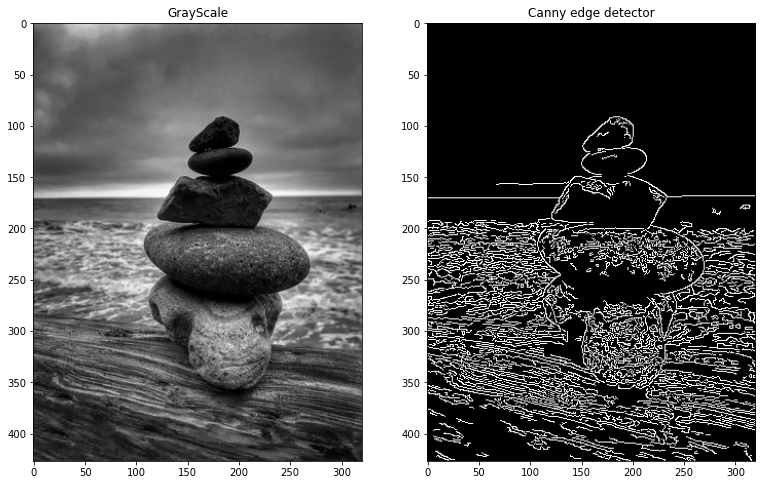

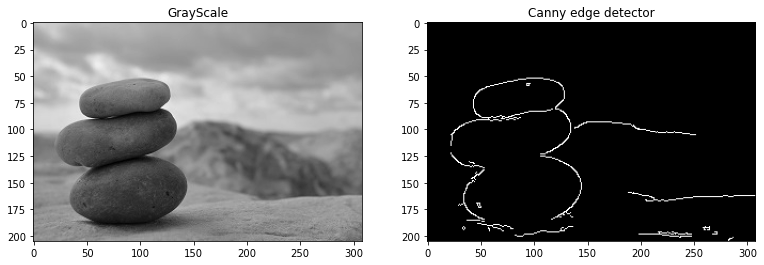

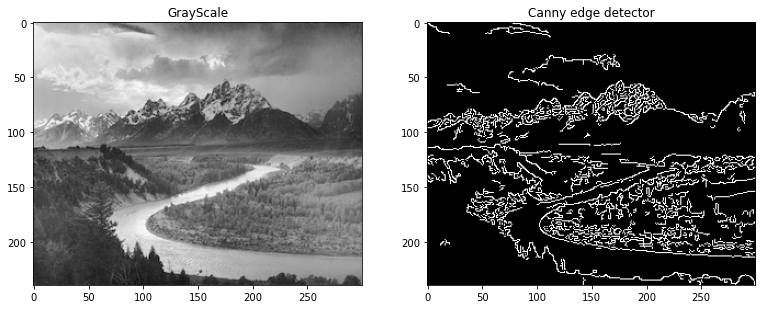

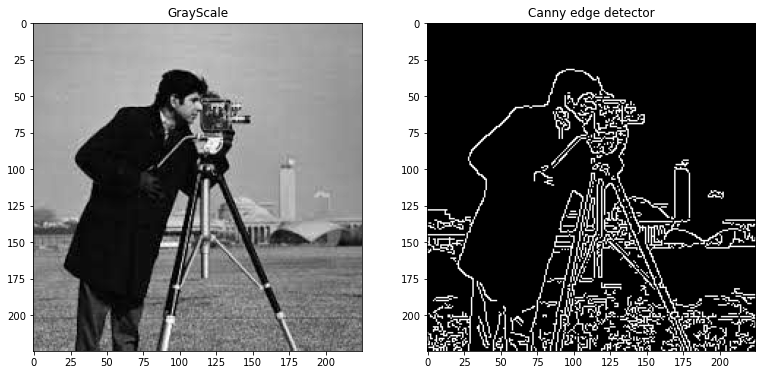

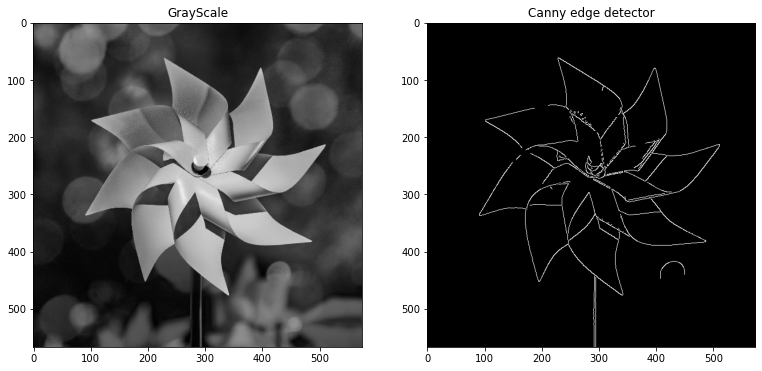

In [161]:
l=0
while l<8:
    img = images_grey[l]
    edges = cv2.Canny(img, 100, 200)
    plt.rcParams['figure.figsize'] = (20.0, 16.0) # set default size of plots
    fig = plt.figure()
    fig.add_subplot(1, 3, 1)
    plt.imshow(img,cmap=plt.cm.gray)
    plt.title("GrayScale")
    fig.add_subplot(1, 3, 2).imshow(edges,cmap=plt.cm.gray)
    plt.title("Canny edge detector")
    l+=1

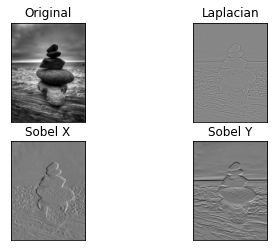

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# loading image
#img0 = cv2.imread('SanFrancisco.jpg',)
img0 = cv2.imread('images/01.jpg',)

# converting to gray scale
gray = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)

# remove noise
img = cv2.GaussianBlur(gray,(3,3),0)

# convolute with proper kernels
laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)  # x
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)  # y

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

In [1]:
import cv2
image=cv2.imread("images/02.jpg")
cv2.imwrite("images/02.jpg",cv2.Canny(image,200,300))
cv2.imshow("Canny",cv2.imread("images/02.jpg"))
cv2.imshow("Orignal",image)